# USA_Housing Dataset - LINEAR REGRESSION

# Linear Regression

 ### Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# import all libraries and dependencies for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE        ## RFE -- Recurssive feature Elimination
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r_squared
import random

from sklearn import metrics

### Import Dataset

In [2]:
path = "C:/Users/miihi/Data/DecodR/Linear Regression/USA_Housing.csv"
df = pd.read_csv(path)

### Load Data

In [3]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


### Understanding Dataset

In [4]:
print(df.shape)
print("\n")
df.info()

(5000, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


### Renaming Columns

-  Keeping all column names in lowercase
-  Using strip function just incase if any column name has unwanted blank spaces then it can be removed

In [5]:
df = df.rename(columns = lambda x : x.strip().lower())
df.columns

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price', 'address'],
      dtype='object')

In [6]:
df = df.drop('address', axis = 1)
df.columns

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms', 'area population', 'price'],
      dtype='object')

### Boxplot of various columns of the data

- Helps Visualize the outliers

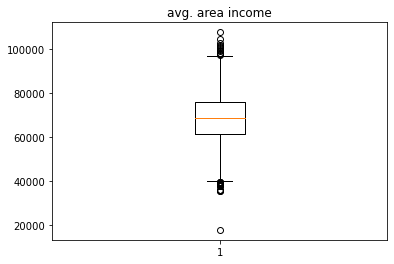

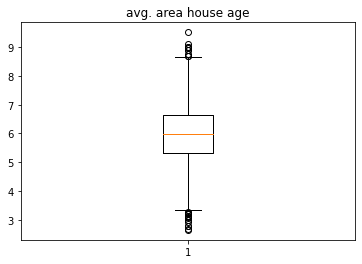

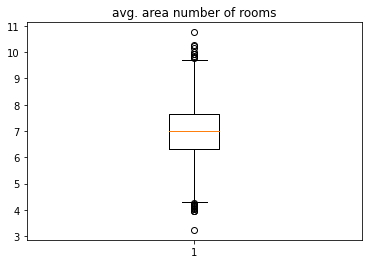

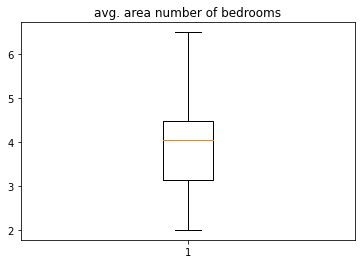

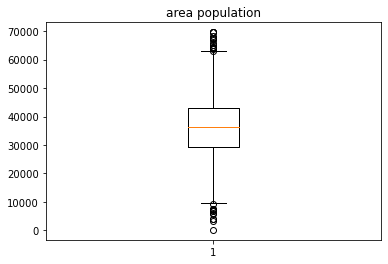

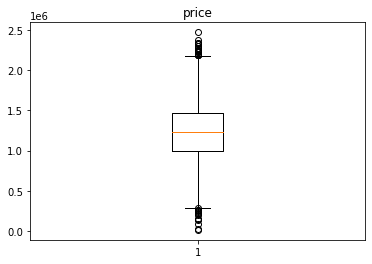

In [24]:
for i in ['avg. area income', 'avg. area house age', 'avg. area number of rooms', 'avg. area number of bedrooms', 'area population', 'price']:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

### Function to find Outliers

In [7]:
#find the outliers for all columns
def find_outliers(ds, col):
    q1 = ds[col].quantile(0.25)
    q3 = ds[col].quantile(0.75)
    iqr = q3 - q1
    
    uw = q3 + 1.5 * iqr
    lw = q1 - 1.5 * iqr
    
    ls = ds.index[ (ds[col] < lw) | (ds[col] > uw) ]
    
    return ls

# Create an empty list to store the outliers from multiple columns

index_lst = []

for feature in ['avg. area income', 'avg. area house age', 'avg. area number of rooms', 'avg. area number of bedrooms', 'area population', 'price']:
    index_lst.extend(find_outliers(df, feature))


In [8]:
len(index_lst)

146

### Define a functions to remove all outliers and get a cleaned data without outliers:

In [9]:
def remove_outliers(ds, lst):
    lst = sorted(set(lst))
    data = ds.drop(lst)
    return data

df_clean = remove_outliers(df, index_lst)
print(df_clean.shape)



(4865, 6)


### Making boxplot of 1 feature to confirm the removal of the outliers

Text(0.5, 1.0, 'Clean Data - Feature = avg. area income')

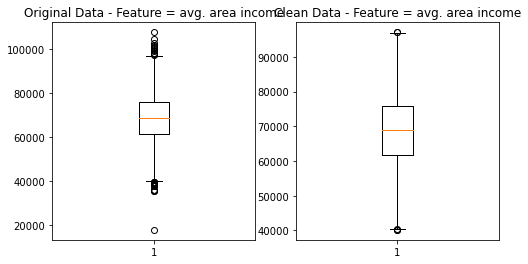

In [37]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.boxplot(df['avg. area income'])
plt.title("Original Data - Feature = avg. area income")


plt.subplot(1,2,2)
plt.boxplot(df_clean['avg. area income'])
plt.title("Clean Data - Feature = avg. area income")

## Seperating Target variable

In [10]:
y = df_clean['price']
print(y.shape)
print("\n")
y.head(2)

(4865,)




0    1.059034e+06
1    1.505891e+06
Name: price, dtype: float64

In [11]:
df_clean = df_clean.drop(['price'], 1)
df_clean.shape

(4865, 5)

A. Since all columns are numeric hence no need to split for numeric and categorical columns

B. Making Heatmap to see correlation between the variables

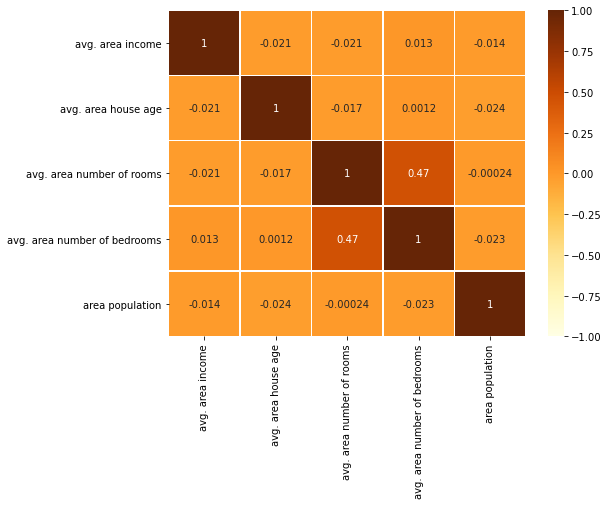

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(), annot = True, vmin=-1, vmax=1, linewidths= 0.5, cmap= "YlOrBr" ) 
# other colour options  cmap="PuBuGn", "PuBu", "GnBu", "PuRd", "OrRd", "YlOrRd", "YlOrBr", "YlGnBu" ; "PiYG", "BuPu" , "Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",    

plt.show()

## Data preprocessing

In [12]:
x = df_clean[ : ]
x.shape

(4865, 5)

In [13]:
y.shape

(4865,)

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

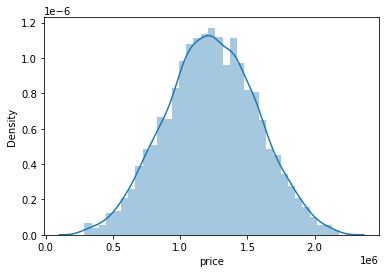

In [14]:
sns.distplot(y)

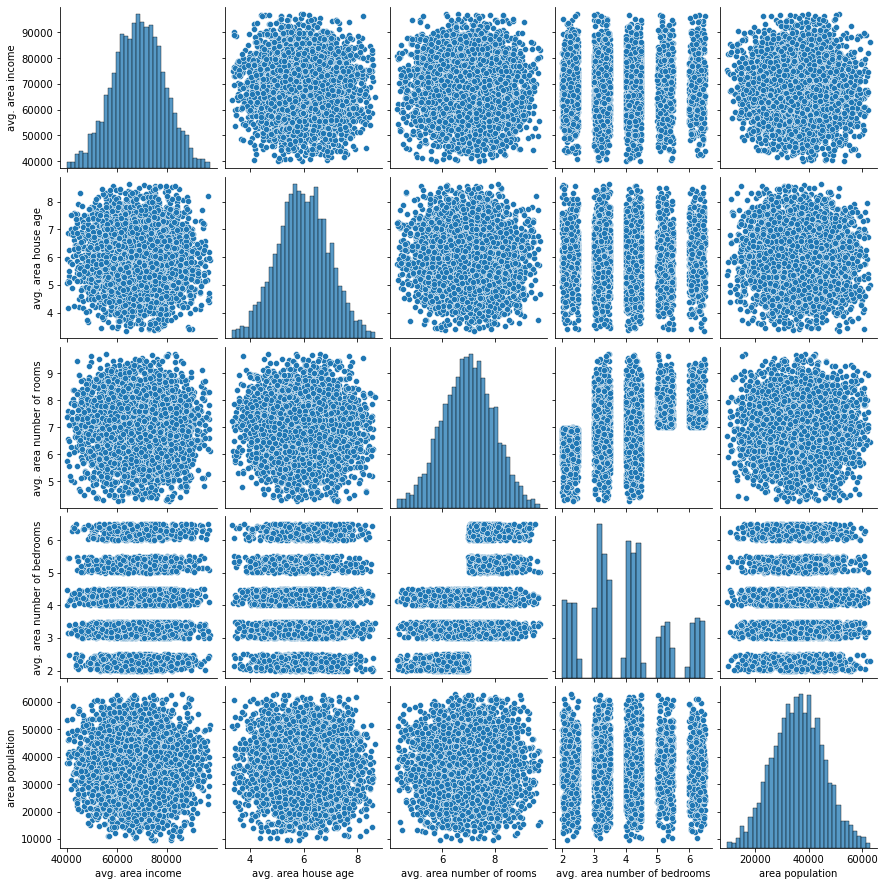

In [76]:
ax = sns.pairplot(x)

the y variable is almost perfectly normally distributed

## Splitting the data into training and testing

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 100)

## Model building

### Using RFE (Recurrsive Feature Elimination) by observing p-value and VIF values 

In [16]:
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

#### Running RFE with important column count to be 4

 - Total number of **independent columns is 5** in **x** variable

In [17]:
rfe = RFE(lm, 4)
rfe = rfe.fit(xtrain, ytrain)

C:\Users\miihi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [18]:
rfe_data = pd.DataFrame(zip(xtrain.columns, rfe.support_, rfe.ranking_), columns=['Feature', 'RFE Support', 'RFE Rank'])
rfe_data

,Feature,RFE Support,RFE Rank
0,avg. area income,True,1
1,avg. area house age,True,1
2,avg. area number of rooms,True,1
3,avg. area number of bedrooms,True,1
4,area population,False,2


### Selecting the important features from the support dataframe

In [19]:
imp_col = xtrain.columns[rfe.support_]
imp_col

Index(['avg. area income', 'avg. area house age', 'avg. area number of rooms',
       'avg. area number of bedrooms'],
      dtype='object')

### Creating Dataframe of the important columns selected from the rfe support

In [20]:
xtrain_rfe = xtrain[imp_col]
xtrain_rfe.head(2)

,avg. area income,avg. area house age,avg. area number of rooms,avg. area number of bedrooms
1713,63658.428398,6.568438,6.748590,2.05
1520,69882.273926,5.646558,5.647646,4.35


After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value. Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.

1. High p-value High VIF : Drop the variable
2. High p-value Low VIF : Drop the variable with high p-value first
3. Low p-value Low VIF : accept the variable
    
### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [21]:
random.seed(0)

## Adding a Constant Column:

xtrain_rfe_const = sm.add_constant(xtrain_rfe)

## build OLS Model with RFE features

lm_rfe = sm.OLS( ytrain, xtrain_rfe_const).fit()

print(lm_rfe.summary())


### Create a dataframe thst will contain the names of all the variables and their VIF values

vif = pd.DataFrame()

vif['Feature'] = xtrain_rfe.columns
vif['VIF'] = [variance_inflation_factor(xtrain_rfe.values, i ) for i in range ( xtrain_rfe.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)
print("\n")
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     2398.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:53:46   Log-Likelihood:                -49277.
No. Observations:                3648   AIC:                         9.856e+04
Df Residuals:                    3643   BIC:                         9.859e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Feature,VIF
2,avg. area number of rooms,45.062329
0,avg. area income,29.568639
1,avg. area house age,27.029843
3,avg. area number of bedrooms,14.529454


Feature **avg. area number of rooms** has **highest p-value and VIF score** both, hence we can **drop that feature** from xtest as well as from the rfe model

In [22]:
xtest = xtest.drop(['avg. area number of rooms', 'area population'], axis = 1)
xtest.head(2)

,avg. area income,avg. area house age,avg. area number of bedrooms
3532,71114.022349,6.141958,4.07
2212,66407.791447,6.303686,2.00


In [23]:
xtrain_rfe1 = xtrain_rfe.drop(['avg. area number of rooms'], axis = 1)

## Adding a constant variable column 
xtrain_rfe1_const = sm.add_constant(xtrain_rfe1)
lm_rfe1 = sm.OLS(ytrain, xtrain_rfe1_const).fit()

print(lm_rfe1.summary())
print('\n')

## Creating a VIF dataframe for each feature in 2nd model

vif = pd.DataFrame()

vif['Feature'] = xtrain_rfe1.columns
vif['VIF'] = [ variance_inflation_factor(xtrain_rfe1.values, i)  for i in range (xtrain_rfe1.shape[1]) ]
vif = vif.sort_values(by = 'VIF', ascending = False)

vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2059.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:55:29   Log-Likelihood:                -49821.
No. Observations:                3648   AIC:                         9.965e+04
Df Residuals:                    3644   BIC:                         9.968e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Feature,VIF
0,avg. area income,23.360635
1,avg. area house age,22.433334
2,avg. area number of bedrooms,10.099888


**VIF** of **avg. area income** is the **Highest**. Hence we would **Remove** it from the xtest as well as from the rfe model

In [110]:
xtest = xtest.drop(['avg. area income'], axis = 1)
xtest.head(1)

,avg. area house age,avg. area number of bedrooms
3532,6.141958,4.07


In [24]:
xtrain_rfe2 = xtrain_rfe1.drop(['avg. area income'], axis = 1)

# Adding a constant variable column

xtrain_rfe2_const = sm.add_constant(xtrain_rfe2)
lm_rfe2 = sm.OLS(ytrain, xtrain_rfe2_const).fit()

print(lm_rfe2.summary())
print('\n')

## Creating a VIF dataframe for each feature in 3rd model

vif = pd.DataFrame()

vif['Feature'] = xtrain_rfe2.columns

vif['VIF'] = [variance_inflation_factor(xtrain_rfe2.values, i) for i in range(xtrain_rfe2.shape[1])]
vif = vif.sort_values(by = 'VIF', ascending = False)

vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     511.4
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          1.76e-196
Time:                        12:56:42   Log-Likelihood:                -51179.
No. Observations:                3648   AIC:                         1.024e+05
Df Residuals:                    3645   BIC:                         1.024e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

,Feature,VIF
1,avg. area number of bedrooms,8.893638
0,avg. area house age,8.893638


## Building Final Model using remaining Features

In [25]:
# Predicting the life_expectancy of training set.

xtrain = xtrain_rfe2
model_final = LinearRegression()

model_final.fit(xtrain, ytrain)

LinearRegression()

### Coefficients

In [26]:
model_final.coef_

array([153958.34454904,  42932.3682717 ])

### Intercept

In [27]:
model_final.intercept_

139804.7251075504

## Prediction

In [40]:
prediction = model_final.predict(xtest)
prediction

array([1260145.14373444, 1196174.51005774, 1445746.74163718, ...,
       1151480.20115564, 1377996.32917875, 1353886.68855067])

## Model Evaluation

In [42]:
print("Mean Absolute Error:", np.round(metrics.mean_absolute_error(ytest, prediction), 2))
print("Mean Square Error:", np.round(metrics.mean_squared_error(ytest, prediction), 2))
print("R Square", np.round(metrics.r2_score(ytest, prediction), 2))
print("Root Mean Squared Error:", np.round(np.sqrt(metrics.r2_score(ytest, prediction)), 2))

Mean Absolute Error: 239354.44
Mean Square Error: 87365842697.04
R Square 0.23
Root Mean Squared Error: 0.48


## Check for Linearity

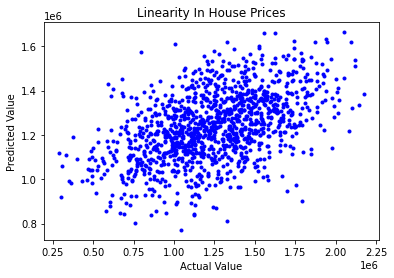

In [50]:
plt.scatter(ytest, prediction, c= "blue", marker = ".")
plt.title("Linearity In House Prices")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

## Histogram of the Errors

C:\Users\miihi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


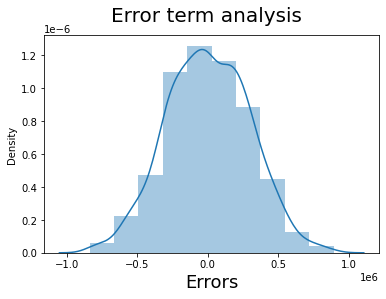

In [131]:
fig = plt.figure()
sns.distplot(ytest - prediction, bins = 10)
fig.suptitle("Error term analysis", fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

plt.show()